<a href="https://colab.research.google.com/github/Vaibhav807/Artificial-Intelligence-Basic-Projects/blob/main/Salary_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn # nn contains all of PyTorch's building blocks for neural networks

In [ ]:
import pandas as pd

# Replace 'file_name.csv' with the actual name of your uploaded CSV file
file_path = 'Salary_Data.csv'

# Use the read_csv() function from Pandas to read the CSV file
data = pd.read_csv(file_path)

# Now, you can work with the 'data' DataFrame, which holds your CSV data
# For example, you can display the first few rows of the DataFrame:
print(data.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


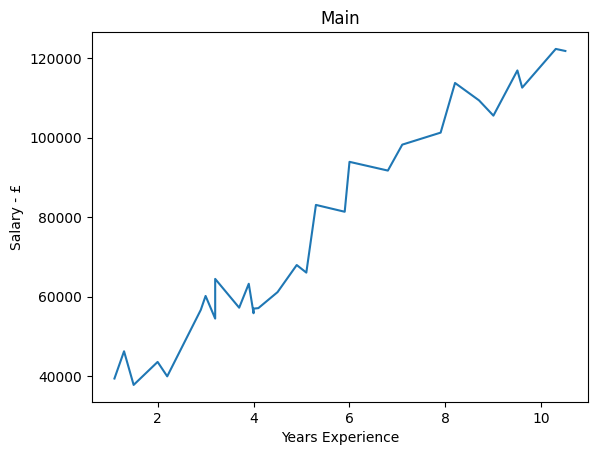

In [ ]:
x = data["YearsExperience"]
y = data["Salary"]

plt.plot(x,y)
plt.title

x_train = x[25:]
y_train = y[25:]

# Set the title for the plot
plt.title('Main')
plt.xlabel("Years Experience")
plt.ylabel("Salary - £")

# Display the plot
plt.show()

In [ ]:
# Conversion to tensors
years = torch.tensor(x.values)
years = years[:-5]
salary = torch.tensor(y.values)
salary = salary[:-5]

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
# Define dataset
train_ds = TensorDataset(years, salary)
train_ds[0:3]

(tensor([1.1000, 1.3000, 1.5000], dtype=torch.float64),
 tensor([39343, 46205, 37731]))

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([8.7000, 6.8000, 4.5000, 4.1000, 6.0000], dtype=torch.float64)
tensor([109431,  91738,  61111,  57081,  93940])


In [ ]:
class myLinearRegressionModel(nn.Module):
  def __init__(self):
        super().__init__()
        # Setting the Parameters
        self.years_experience = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad = True)

        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad = True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.years_experience * x + self.bias

In [ ]:
torch.manual_seed(1)

salary_model = myLinearRegressionModel() # Creation of an instance of the Linear Regression Model

(salary_model.state_dict()) # Checking the values of both of the parameters - Weight and Bias

OrderedDict([('years_experience', tensor([0.6614])),
             ('bias', tensor([0.2669]))])

In [ ]:
# Creation of the Loss Function:
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss
optimizer = torch.optim.SGD(params=salary_model.parameters(), lr=100)

In [ ]:
epochs = 10000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  salary_model.train()

  y_pred = salary_model(years)
  loss = loss_fn(y_pred, salary)
  optimizer.zero_grad()
# 4. Loss backwards
  loss.backward()
# 5. Progress the optimizer
  optimizer.step()

  salary_model.eval()

  with torch.inference_mode():

    # Print out what's happening
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())

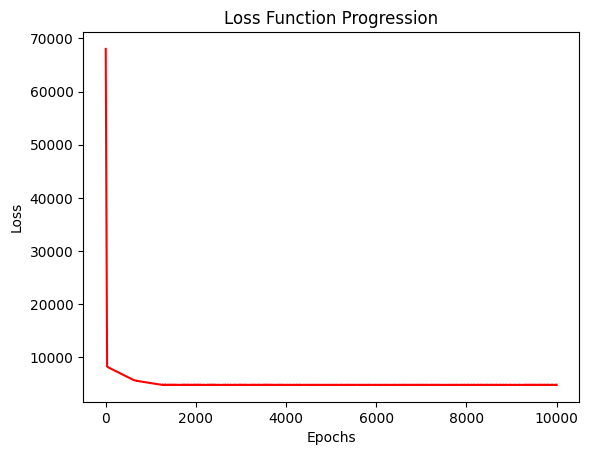

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Loss Function", c = "r")
plt.title("Loss Function Progression")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

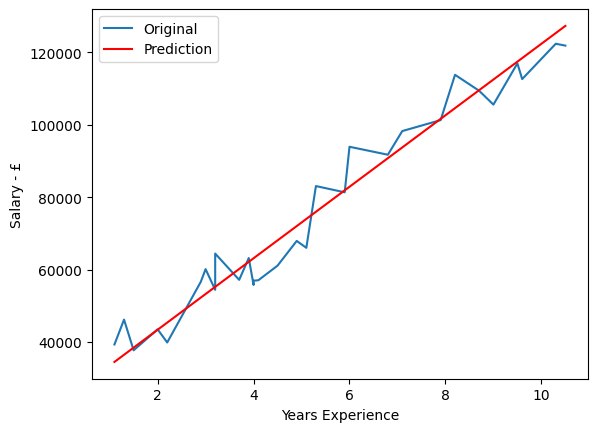

In [ ]:
plt.plot(x,y, label="Original")
plt.plot(x,salary_model.years_experience.detach().numpy()*x+salary_model.bias.detach().numpy(), c="r", label="Prediction")
plt.legend()
plt.xlabel("Years Experience")
plt.ylabel("Salary - £")
plt.show()